In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import cmath
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 7);

Populating the interactive namespace from numpy and matplotlib


In [2]:
countByDay = pd.read_csv('data\out_countByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')
posByDay = pd.read_csv('data\out_posByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')
neutrByDay = pd.read_csv('data\out_neutrByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')
negByDay = pd.read_csv('data\out_negByDay.csv', header=0, parse_dates=[0]).sort_values(by = 'day')

In [3]:
#create dimensionless values
ftse = pd.read_csv('data\FTSE.csv', header=0, parse_dates=[0]).sort_values(by = 'Date')
ftse = ftse[['Date', 'Adj Close', 'Volume']]
ftse.columns = ['day', 'price', 'volume']
ftse.head()

,day,price,volume
0,2015-02-11,6818.200195,623275800
1,2015-02-12,6828.100098,809863300
2,2015-02-13,6873.500000,734854200
3,2015-02-16,6857.100098,415979100
4,2015-02-17,6898.100098,612932700


In [4]:
ftse['priceDl'] = ftse['price'].apply(lambda x: x / ftse['price'][0])
ftse['volumeDl'] = ftse['volume'].apply(lambda x: x / ftse['volume'][0])
#ftse['complex'] = ftse['priceDl'] + ftse['volumeDl'] * 1j
ftse.head()

,day,price,volume,priceDl,volumeDl
0,2015-02-11,6818.200195,623275800,1.000000,1.000000
1,2015-02-12,6828.100098,809863300,1.001452,1.299366
2,2015-02-13,6873.500000,734854200,1.008111,1.179019
3,2015-02-16,6857.100098,415979100,1.005705,0.667408
4,2015-02-17,6898.100098,612932700,1.011719,0.983405


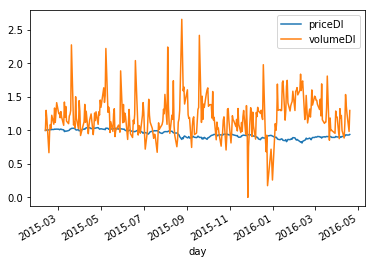

In [5]:
ftse[['day', 'priceDl', 'volumeDl']].plot(x='day')

In [6]:
results = pd.merge(posByDay, neutrByDay, on='day')
results = pd.merge(results, negByDay, on='day')
results.columns = ['day', 'positive', 'neutral', 'negative']
results.head()

,day,positive,neutral,negative
0,2016-02-24,738,4624,2511
1,2016-02-25,1138,6670,3583
2,2016-02-26,952,5775,3287
3,2016-02-27,804,4578,2360
4,2016-02-28,1057,5172,2616


In [7]:
results["diff"] = (results["positive"] - results["negative"])/(results["positive"] + results["neutral"] + results["negative"])
results.head()

,day,positive,neutral,negative,diff
0,2016-02-24,738,4624,2511,-0.225200
1,2016-02-25,1138,6670,3583,-0.214643
2,2016-02-26,952,5775,3287,-0.233174
3,2016-02-27,804,4578,2360,-0.200982
4,2016-02-28,1057,5172,2616,-0.176258


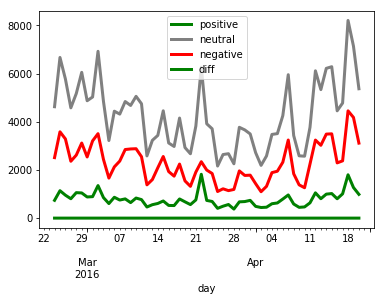

In [8]:
results.plot(x='day', linewidth = 3, color=['g', 'gray', 'r'])

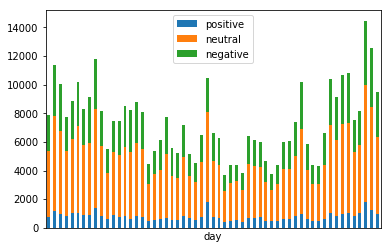

In [9]:
results[['day','positive','neutral','negative']].plot.bar(x='day', stacked=True);
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [10]:
allRes = pd.merge(results[["day", "diff"]], ftse[['day','priceDl','volumeDl']], on = 'day')
allRes['complex'] = allRes['volumeDl'] + allRes['diff'] * 1j
allRes.head()

,day,diff,priceDl,volumeDl,complex
0,2016-02-24,-0.225200,0.860520,1.339186,(1.339186440416907-0.22520005080655406j)
1,2016-02-25,-0.214643,0.881875,1.604357,(1.6043570117755255-0.2146431393205162j)
2,2016-02-26,-0.233174,0.894078,1.378102,(1.3781019574320068-0.23317355702017176j)
3,2016-02-29,-0.202879,0.894239,1.510897,(1.5108969416107605-0.20287868403015763j)
4,2016-03-01,-0.200386,0.902423,1.497934,(1.4979343013157258-0.20038605380624924j)


## Нахождение коэффициента парной корреляции 

In [11]:
def rc(y,x):
    #Центрирование
    yr = y.real - y.real.mean()
    yi = y.imag - y.imag.mean()
    xr = x.real - x.real.mean()
    xi = x.imag - x.imag.mean()
    
#     print(y.real.mean())    
#     print(y.imag.mean())
#     print(x.real.mean())
#     print(x.imag.mean())
    
    rc_xy = (
        ((yr + 1j*yi)*(xr + 1j*xi)).sum()
        / 
        sqrt(((yr + 1j*yi)**2).sum() * ((xr + 1j*xi)**2).sum())
        )
    return rc_xy;

In [12]:
y = pd.DataFrame({"y":[(1+3j),(2+2j),(3+3j)],
                  "x":[(1+1j),(2+4j),(3+3j)]})
print(rc(y['y'], y['x']))
print(np.corrcoef(y['y'], y['x'])[0][1])

(1.317736781254481-0.7880644702600822j)
(0.15811388300841897-0.474341649025257j)


In [13]:
y = pd.DataFrame({"y":[(1+0j),(2+2j)],
                  "x":[(0+1j),(1+2j)]})
print(rc(y['y'], y['x']))
print(np.corrcoef(y['y'], y['x'])[0][1])

(-1-0j)
(0.9486832980505138+0.31622776601683794j)


In [14]:
allRes.columns = ['date', 'sentimentCoef', 'priceDl', 'volumeDl', 'complex']
allRes = allRes.sort_values(by = 'date')
allRes.to_csv("data/out_allRes.csv")
allRes

,date,sentimentCoef,priceDl,volumeDl,complex
0,2016-02-24,-0.225200,0.860520,1.339186,(1.339186440416907-0.22520005080655406j)
1,2016-02-25,-0.214643,0.881875,1.604357,(1.6043570117755255-0.2146431393205162j)
2,2016-02-26,-0.233174,0.894078,1.378102,(1.3781019574320068-0.23317355702017176j)
3,2016-02-29,-0.202879,0.894239,1.510897,(1.5108969416107605-0.20287868403015763j)
4,2016-03-01,-0.200386,0.902423,1.497934,(1.4979343013157258-0.20038605380624924j)
5,2016-03-02,-0.253699,0.901572,1.451287,(1.451287375508563-0.2536986301369863j)
6,2016-03-03,-0.182906,0.899138,1.448541,(1.4485407583609053-0.182906127991852j)
7,2016-03-04,-0.194912,0.909243,1.389515,(1.38951536382449-0.19491212977755928j)
8,2016-03-07,-0.217590,0.906750,1.312350,(1.312349845766513-0.21759010220548683j)
9,2016-03-08,-0.241513,0.898390,1.465671,(1.4656705747279133-0.24151343705799153j)


In [15]:
print('rc volume-volume:     ' + str(rc(allRes['complex'],
                                    allRes['complex'])))

print('rc volume-price:      ' + str(rc(allRes['complex'],
                                    allRes['priceDl'])))

print('rc price-volume*1000: ' + str(rc(allRes['complex'],
                                    allRes['priceDl']*1000)))

rc volume-volume:     (1+0j)
rc volume-price:      (-0.16925067162185772-0.0009336831172452067j)
rc price-volume*1000: (-0.169250671621857-0.0009336831172451742j)


In [16]:
#rc
print(rc(allRes['sentimentCoef'], allRes['priceDl']))
#Стандартная функция для нахождения корреляции
print(np.corrcoef(allRes['sentimentCoef'], allRes['priceDl'])[0][1])

(0.01854807891097653+0j)
0.018548078910976526


In [17]:
#rc
print(rc(allRes['priceDl'],allRes['complex']))
#Стандартная функция для нахождения корреляции
print(np.corrcoef(allRes['priceDl'],allRes['complex'])[0][1])

(-0.16925067162185772-0.0009336831172452067j)
(-0.165151433030158-0.00289135318081451j)


In [18]:
startShift = -14
endShift = 14

#correlation coef dataframe
rcdf = pd.DataFrame(columns=('shift', 'rc'))

for i in range(startShift, endShift+1):
    if (i < 0):
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['priceDl'].iloc[:i],
                                  allRes['complex'].shift(i).iloc[:i])],
                            "npcorr":np.corrcoef(allRes['priceDl'].iloc[:i], 
                                                 allRes['complex'].shift(i).iloc[:i])[0][1]})
    elif (i == 0):
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['priceDl'],
                                  allRes['complex'])],
                            "npcorr":np.corrcoef(allRes['priceDl'], 
                                                 allRes['complex'])[0][1]})
    else:    
        row = pd.DataFrame({"shift":[i], 
                            "rc": [rc(allRes['priceDl'].iloc[i:],
                                  allRes['complex'].shift(i).iloc[i:])],
                            "npcorr":np.corrcoef(allRes['priceDl'].iloc[i:], 
                                                 allRes['complex'].shift(i).iloc[i:])[0][1]})

    rcdf = rcdf.append(row, ignore_index=True, sort=False)
    
rcdf.head()

,shift,rc,npcorr
0,-14,(-0.0516935796836462+0.024238399180945187j),(-0.049522143290745814-0.02448603317296229j)
1,-13,(-0.04764561910826062+0.026985653530329556j),(-0.045561320229952657-0.026934397753462413j)
2,-12,(-0.07470651358270995+0.03871882418958121j),(-0.07149641946302292-0.038743368764772294j)
3,-11,(-0.35280345844546396+0.02376810371051404j),(-0.34248184327656434-0.031515704086360063j)
4,-10,(-0.03755891184894005+0.040378964438389314j),(-0.03540893593111466-0.04009723473682393j)


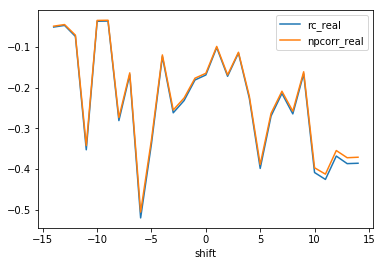

In [32]:
rcdf['rc_real'] = rcdf['rc'].apply(lambda x: x.real)
rcdf['npcorr_real'] = rcdf['npcorr'].apply(lambda x: x.real)
rcdf[['shift','rc_real', 'npcorr_real']].plot(x = 'shift')

In [20]:
def linregb(y, x):
    #Центрирование
    yr = y.real - y.real.mean()
    yi = y.imag - y.imag.mean()
    xr = x.real - x.real.mean()
    xi = x.imag - x.imag.mean()
    
#     print(y.real.mean())    
#     print(y.imag.mean())
#     print(x.real.mean())
#     print(x.imag.mean())
    
    b = (
        ((yr + 1j*yi)*(xr + 1j*xi)).sum()
        / 
        ((xr + 1j*xi)**2).sum()
    )

    return b

In [21]:
lrdf = allRes[['date', 'complex', 'priceDl']] 

#b0 + ib1, где y = 'priceDl', x = 'complex'
b = linregb(allRes['priceDl'], allRes['complex'])
print('b = ', b)

lrdf = lrdf.copy(deep = True)
lrdf['lrPriceDl'] = lrdf['complex'] * b
lrdf.head(5)

b =  (-0.01108018078412028-0.0003162978775780783j)


,date,complex,priceDl,lrPriceDl
0,2016-02-24,(1.339186440416907-0.22520005080655406j),0.860520,(-0.014909658161562438+0.0020716754467444815j)
1,2016-02-25,(1.6043570117755255-0.2146431393205162j),0.881875,(-0.017844456902147587+0.001870830070040329j)
2,2016-02-26,(1.3781019574320068-0.23317355702017176j),0.894078,(-0.015343371128489477+0.0021477144416379426j)
3,2016-02-29,(1.5108969416107605-0.20287868403015763j),0.894239,(-0.01680518135638622+0.0017700390004278693j)
4,2016-03-01,(1.4979343013157258-0.20038605380624924j),0.902423,(-0.016660764544828306+0.0017465202625321294j)


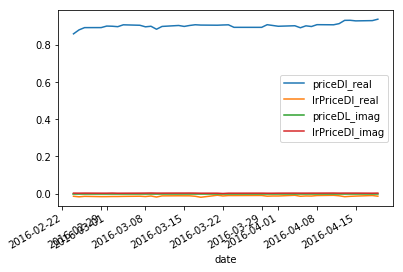

In [22]:
lrdf['priceDl_real'] = lrdf['priceDl'].apply(lambda x: x.real)
lrdf['lrPriceDl_real'] = lrdf['lrPriceDl'].apply(lambda x: x.real)
lrdf['priceDL_imag'] = lrdf['priceDl'].apply(lambda x: x.imag)
lrdf['lrPriceDl_imag'] = lrdf['lrPriceDl'].apply(lambda x: x.imag)
lrdf[['date', 'priceDl_real', 'lrPriceDl_real', 'priceDL_imag', 'lrPriceDl_imag']].plot(x = 'date')

shift = -14   b = (-0.0026825183086598135+0.0011905513687201993j)
shift = -13   b = (-0.0024863851672665134+0.0013479021955559729j)
shift = -12   b = (-0.0038966248105262525+0.001929268531654219j)
shift = -11   b = (-0.01640644802870548+0.0007021666128278178j)
shift = -10   b = (-0.0018072102086604468+0.0018449129042027916j)
shift = -9   b = (-0.001726343259292777+0.0012712540058046385j)
shift = -8   b = (-0.012757814189322234-0.0014970699623297167j)
shift = -7   b = (-0.00768792924471235-0.0008120831597305228j)
shift = -6   b = (-0.02362817000853175-0.001193046481118712j)
shift = -5   b = (-0.01561165244901521+0.00031040747180316534j)
shift = -4   b = (-0.006407311689953803+0.000917876562921078j)
shift = -3   b = (-0.014587056517398216-0.0002639510796929581j)
shift = -2   b = (-0.013714952083757425+0.0002751512899883575j)
shift = -1   b = (-0.010986766211888382-0.0003861161863993796j)
shift = 0   b = (-0.01108018078412028-0.0003162978775780783j)
shift = 1   b = (-0.005769578063954146+

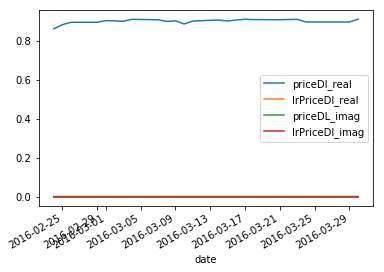

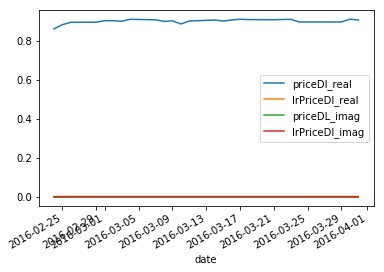

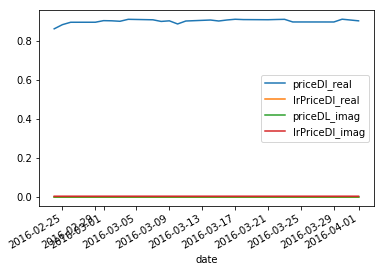

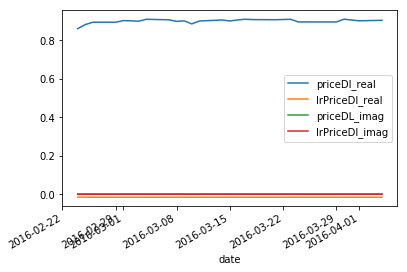

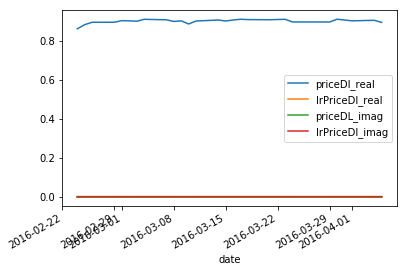

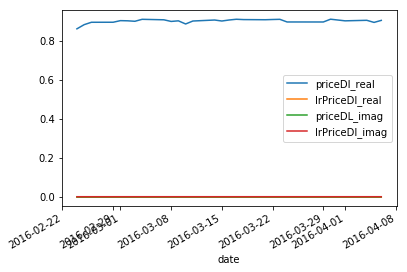

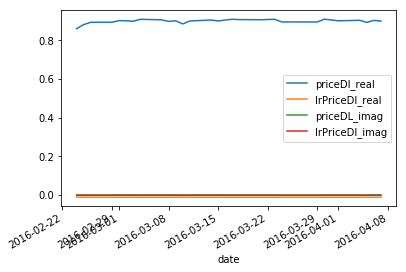

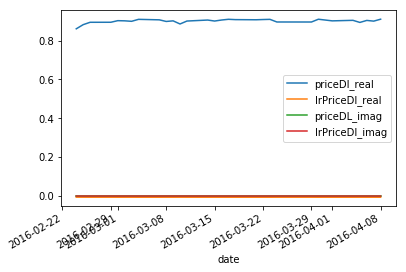

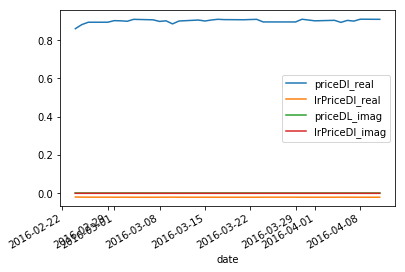

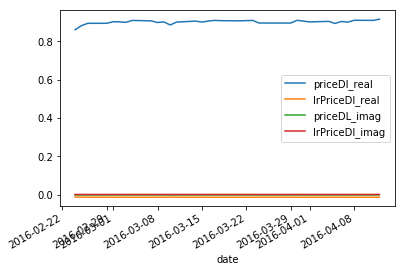

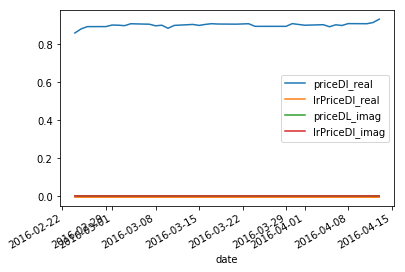

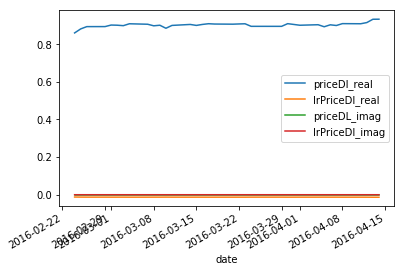

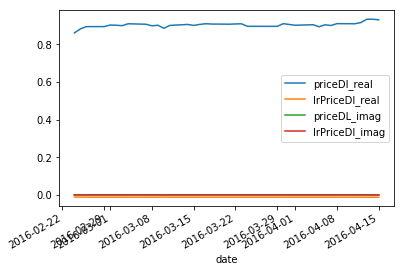

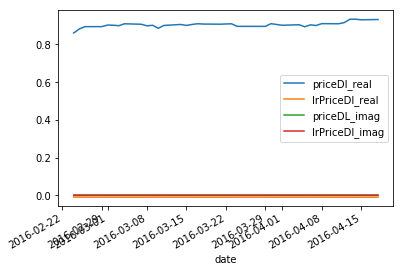

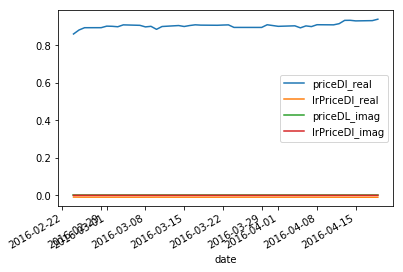

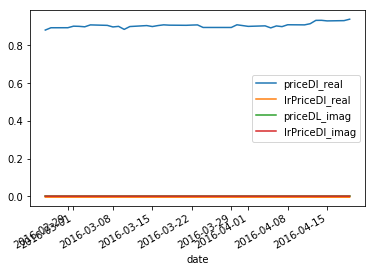

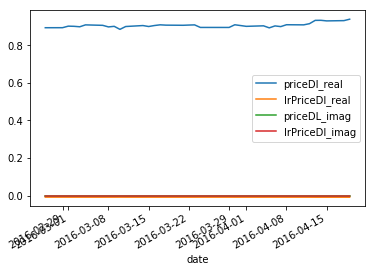

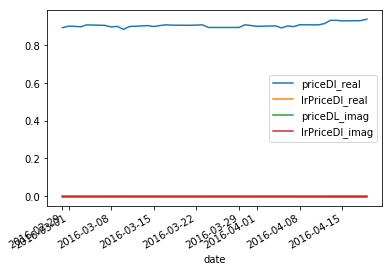

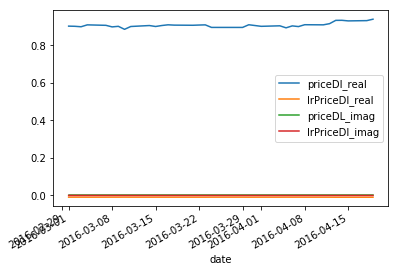

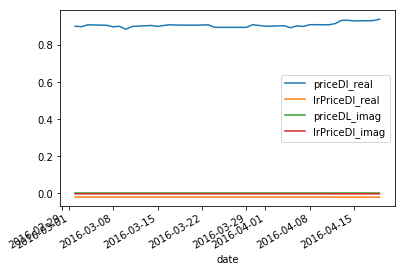

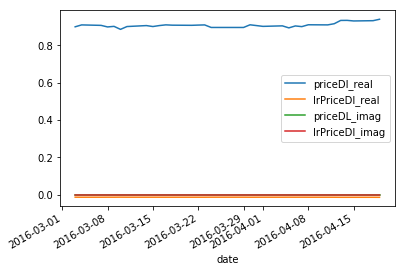

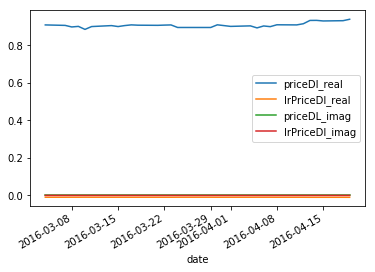

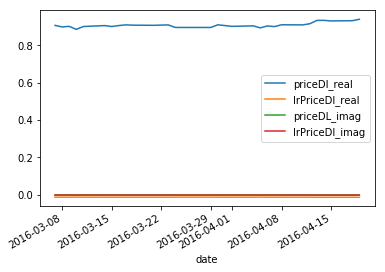

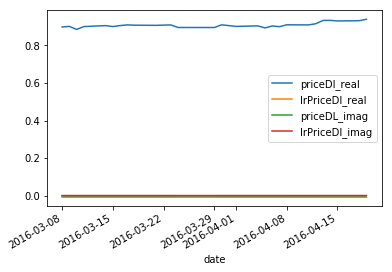

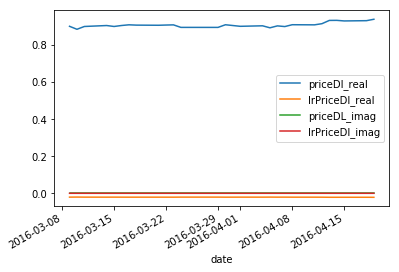

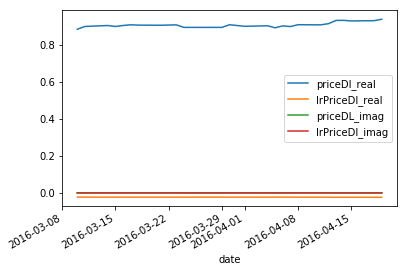

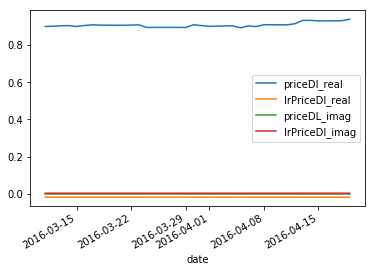

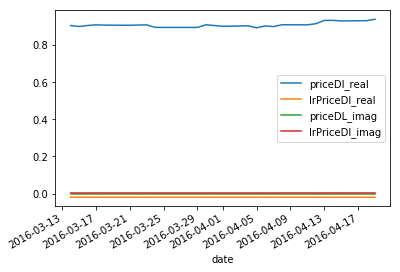

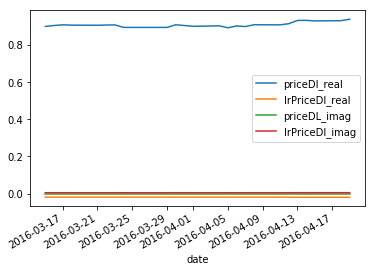

In [29]:
startShift = -14
endShift = 14

for i in range(startShift, endShift+1):
    lrdf = pd.DataFrame()
    if (i < 0):
        b = linregb(allRes['priceDl'].iloc[:i],
                                  allRes['complex'].shift(i).iloc[:i])
        lrdf[['date','priceDl']] = allRes[['date','priceDl']].iloc[:i]
        lrdf['complex'] = allRes['complex'].shift(i).iloc[:i]
    
    elif (i == 0):
        b = linregb(allRes['priceDl'],
                                  allRes['complex'])
        lrdf[['date','priceDl','complex']] = allRes[['date','priceDl','complex']]
    
    else:    
        b = linregb(allRes['priceDl'].iloc[i:],
                                  allRes['complex'].shift(i).iloc[i:])
        lrdf[['date','priceDl']] = allRes[['date','priceDl']].iloc[i:]
        lrdf['complex'] = allRes['complex'].shift(i).iloc[i:]
    
    print('shift =', i, '  b =', b)

    lrdf = lrdf.copy(deep = True)
    lrdf['lrPriceDl'] = lrdf['priceDl'] * b    

    lrdf = lrdf.append(row, ignore_index=True, sort=False)
    
    lrdf['priceDl_real'] = lrdf['priceDl'].apply(lambda x: x.real)
    lrdf['lrPriceDl_real'] = lrdf['lrPriceDl'].apply(lambda x: x.real)
    lrdf['priceDL_imag'] = lrdf['priceDl'].apply(lambda x: x.imag)
    lrdf['lrPriceDl_imag'] = lrdf['lrPriceDl'].apply(lambda x: x.imag)
    lrdf[['date', 'priceDl_real', 'lrPriceDl_real', 'priceDL_imag', 'lrPriceDl_imag']].plot(x = 'date')

## Нормирование результатов

In [ ]:
allRes["sentimentCoefNorm"] = ((allRes["sentimentCoef"] - allRes["sentimentCoef"].min()) / 
                        (allRes["sentimentCoef"].max() - allRes["sentimentCoef"].min()))
allRes["priceNorm"]  = ((allRes["price"] - allRes["price"].min()) / 
                        (allRes["price"].max() - allRes["price"].min()))
allRes["volumeNorm"] = ((allRes["volume"] - allRes["volume"].min()) / 
                        (allRes["volume"].max() - allRes["volume"].min()))

In [ ]:
#Стандартная функция для нахождения корреляции
np.corrcoef(allRes['volumeNorm'], allRes['priceNorm'])[0][1]

In [ ]:

print('rc volumeNorm-priceNorm: ' + str(rc(allRes['volumeNorm'],
                                            allRes['priceNorm'])))
# allRes[['date', 
#         'sentimentCoefNorm', 
#         'priceNorm', 
#         'volumeNorm']].plot(x='date',
#                             linewidth = 2, 
#                             color = ['r', 'steelblue', 'slateblue'])